## Regression
The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes anonymized data on loans and borrowers publicly available. We're going to use these data to explore how the interest rate charged on loans depends on various factors.

### Browse Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

loansData = pd.read_csv('loansData.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


* The data have the following variables (with data type and explanation of meaning)
* Amount.Requested - numeric. The amount (in dollars) requested in the loan application.
* Amount.Funded.By.Investors - numeric. The amount (in dollars) loaned to the individual.
* Interest.rate – character. The lending interest rate charged to the borrower.
* Loan.length - character. The length of time (in months) of the loan.
* Loan.Purpose – categorical variable. The purpose of the loan as stated by the applicant.
* Debt.to.Income.Ratio – character The % of consumer’s gross income going toward paying debts.
* State - character. The abbreviation for the U.S. state of residence of the loan applicant.
* Home.ownership - character. Indicates whether the applicant owns, rents, or has a mortgage.
* Monthly.income - categorical. The monthly income of the applicant (in dollars).
* FICO.range – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score.
* Open.CREDIT.Lines - numeric. The number of open lines of credit at the time of application.
* Revolving.CREDIT.Balance - numeric. The total amount outstanding all lines of credit.
* Inquiries.in.the.Last.6.Months - numeric. Number of credit inquiries in the previous 6 months.
* Employment.Length - character. Length of time employed at current job.

### Data Cleanup

In [2]:
loansData.isnull().any()
# some values are missing

Amount.Requested                  False
Amount.Funded.By.Investors        False
Interest.Rate                     False
Loan.Length                       False
Loan.Purpose                      False
Debt.To.Income.Ratio              False
State                             False
Home.Ownership                    False
Monthly.Income                     True
FICO.Range                        False
Open.CREDIT.Lines                  True
Revolving.CREDIT.Balance           True
Inquiries.in.the.Last.6.Months     True
Employment.Length                 False
dtype: bool

In [3]:
loansData.dtypes

# Interest.Rate is not a float64, it is a string.
# Loan.Length is not an int64, it is a string.
# the FICO Range should be represented as a tuple (735,739) or a value 735, not a string "735-739.

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [4]:
loansData["Interest.Rate"] = loansData["Interest.Rate"].str[:-1].astype(np.float64)

In [5]:
loansData["Loan.Length"] = loansData["Loan.Length"].str[:-7].astype(np.int64)

In [6]:
loansData['FICO.Score'] = loansData['FICO.Range'].str.split('-').str[0].astype(np.int64)

In [7]:
loansData.dtypes

Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int64
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
FICO.Score                          int64
dtype: object

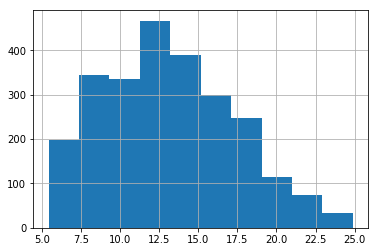

In [8]:
loansData["Interest.Rate"].hist()
#loansData["Interest.Rate"].plot(kind='hist')

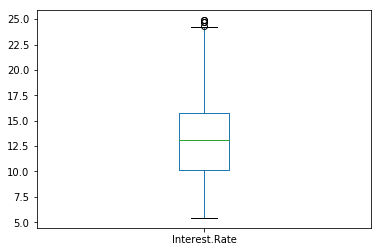

In [9]:
loansData['Interest.Rate'].plot(kind='box')

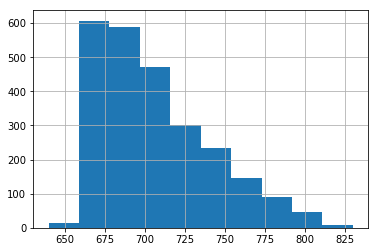

In [10]:
loansData['FICO.Score'].hist()

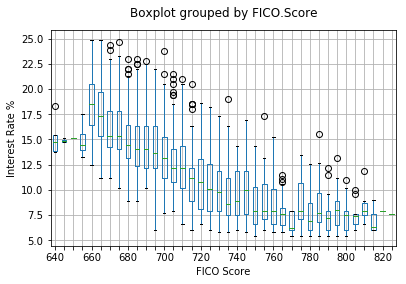

In [11]:
# Next we take a box plot which allows us to quickly look
# at the distribution of interest rates
# based on each FICO score range.

p = loansData.boxplot('Interest.Rate','FICO.Score')

q = p.set_xticklabels(['640','','','','660','','','','680','','','',
                       '700','','','','720','','','','740','','','',
                       '760','','','','780','','','','800','','','',
                       '820','','','','840'])

p.set_xlabel('FICO Score')
p.set_ylabel('Interest Rate %')
p.set_title('                          ')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283867DB860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000283870A9710>]], dtype=object)

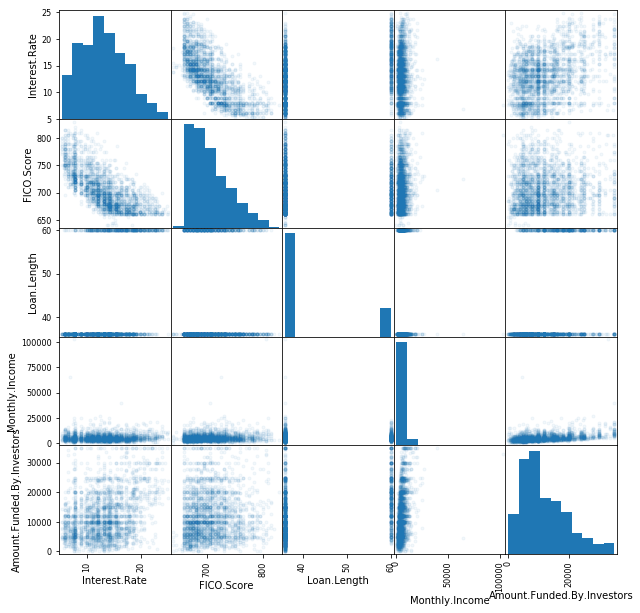

In [12]:
# The scatterplot matrix is a grid of plots of
# multiple variables against each other.
# It shows the relationship of each variable to the others.
# The ones on the diagonal don't fit this pattern.

df = loansData[['Interest.Rate', 'FICO.Score', 'Loan.Length', 'Monthly.Income', 'Amount.Funded.By.Investors']]
pd.scatter_matrix(df, alpha=0.05, figsize=(10,10), diagonal='hist')